In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
path = os.path.dirname(os.getcwd()) + "/data/snoring/spectogram_5s_scale/"

hf = h5py.File(path + "1-0-15.h5", 'r')
spectograms = np.array(hf.get('spectograms'))
targets = np.array(hf.get('targets')).astype(np.long)
hf.close()
print(spectograms.shape)

(180, 129, 155)


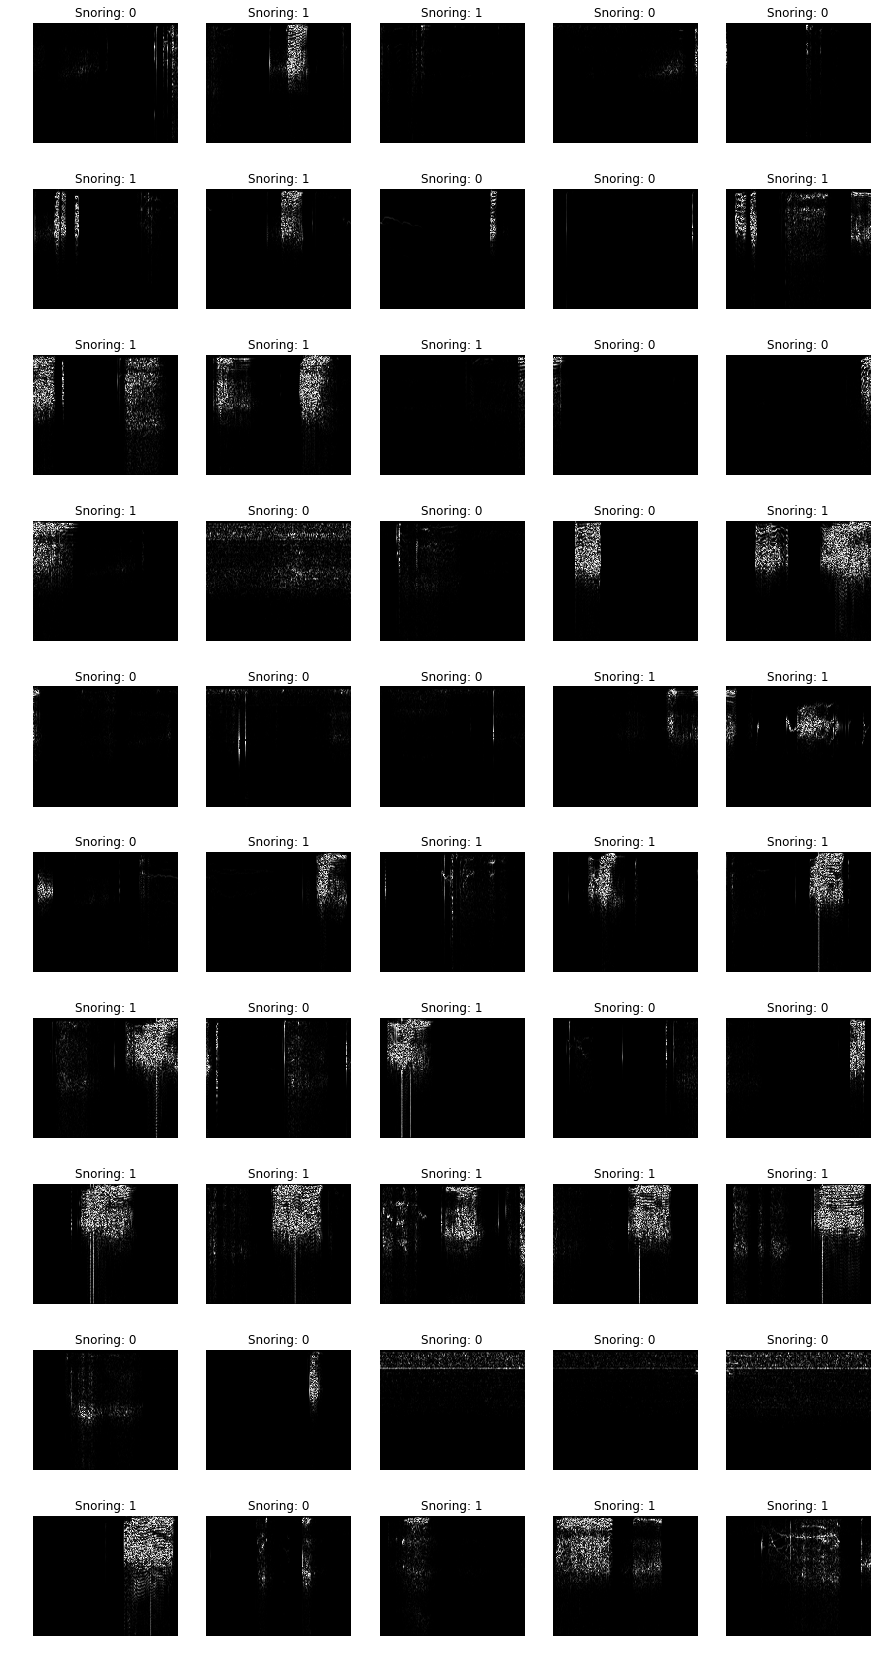

In [3]:

fig=plt.figure(figsize=(15, 30))
columns = 5
rows = 10
for i in range(1, columns*rows +1):
    img = spectograms[i + 60]
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title("Snoring: " + str(targets[i + 60]))
    plt.imshow(img, cmap="gray")

plt.show()

In [4]:
def greyscale_to_heatmap(img, color):
    cmap = plt.get_cmap(color)
    rgba_img = cmap(img)
    rgb_img = np.delete(rgba_img, 3, 2)
    return rgb_img

In [5]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class Snoringread(Dataset):
    def __init__(self, name, transform=None):
        hf = h5py.File(name, 'r')
        self.specs = np.array(hf.get('spectograms'), np.uint8)
        self.labels = np.array(hf.get('targets')).astype(np.long)
        self.cls = np.array(hf.get('class')).astype(np.long)
        self.transform = transform
        hf.close()

    def __len__(self):
        return self.specs.shape[0]

    def __getitem__(self, idx):
        image = self.specs[idx]
        label = self.labels[idx]
        cls =  self.cls[idx]
        if self.transform is not None:
            image = self.transform(image)
        image = image
        
        return image, label, cls
    
class Snoringread_with_class_id(Dataset):
    def __init__(self, name, class_id=[1, 4, 7, 8, 9]):
        hf = h5py.File(name, 'r')
        specs = np.array(hf.get('spectograms'), np.uint8)
        labels = np.array(hf.get('targets')).astype(np.long)
        cls = np.array(hf.get('class')).astype(np.long)
        hf.close()
        
        index = cls == -1
        for i in class_id:
            index = np.logical_or(index, cls == i)
        self.specs = specs[index]
        self.labels = labels[index]
        self.cls = cls[index]

    def __len__(self):
        return self.specs.shape[0]

    def __getitem__(self, idx):
        image = self.specs[idx]
        label = self.labels[idx]
        cls =  self.cls[idx]
        image = image
        
        return image, label, cls

In [6]:
train_data = np.empty(shape=(1, 129, 155))
train_labels = np.empty(shape=(1))
train_cls = np.empty(shape=(1))

for f in os.listdir(path):
    print(f)
    hf = h5py.File(path + f, 'r')
    spectograms = np.array(hf.get('spectograms'))
    targets = np.array(hf.get('targets')).astype(np.long)
    hf.close()
    
#     spectograms_rgb = []
#     for i in range(0, 180):
#         spectograms_rgb.append(greyscale_to_heatmap(spectograms[i], color='hot'))
#     spectograms = np.array(spectograms_rgb)
    
    train_data = np.concatenate([train_data, spectograms])
    train_labels = np.concatenate([train_labels, targets])
    train_cls = np.concatenate([train_cls, np.array([int(f[0])]*180)])
    

8-270-285.h5
9-0-15.h5
4-120-135.h5
8-75-90.h5
9-120-135.h5
7-390-405.h5
7-240-255.h5
1-210-225.h5
1-60-75.h5
7-270-285.h5
7-300-315.h5
9-15-30.h5
9-165-180.h5
1-90-105.h5
7-75-90.h5
9-345-360.h5
8-150-165.h5
8-0-15.h5
4-240-255.h5
9-150-165.h5
4-15-30.h5
7-285-300.h5
9-135-150.h5
9-105-120.h5
7-0-15.h5
9-270-285.h5
1-15-30.h5
9-210-225.h5
1-270-285.h5
8-225-240.h5
4-330-345.h5
5-75-90.h5
8-285-300.h5
4-165-180.h5
9-30-45.h5
1-105-120.h5
9-75-90.h5
7-60-75.h5
8-330-345.h5
1-150-165.h5
7-120-135.h5
1-240-255.h5
9-225-240.h5
7-315-330.h5
7-45-60.h5
1-255-270.h5
9-45-60.h5
4-315-330.h5
8-165-180.h5
7-375-390.h5
7-345-360.h5
4-225-240.h5
9-330-345.h5
1-0-15.h5
1-120-135.h5
8-60-75.h5
8-345-360.h5
9-90-105.h5
7-30-45.h5
9-405-420.h5
4-285-300.h5
8-255-270.h5
7-180-195.h5
7-150-165.h5
4-195-210.h5
1-300-315.h5
1-285-300.h5
4-30-45.h5
8-195-210.h5
4-300-315.h5
9-60-75.h5
9-285-300.h5
7-360-375.h5
4-105-120.h5
9-195-210.h5
9-300-315.h5
5-90-105.h5
5-0-15.h5
9-375-390.h5
4-135-150.h5
9-255-270.

In [7]:
print(train_data.shape)
print(train_labels.shape)
print(train_cls.shape)

hf = h5py.File(os.path.dirname(os.getcwd()) + "/data/snoring/snoring5s_scale.h5", 'w')
hf.create_dataset('spectograms', data=train_data[1:])
hf.create_dataset('targets', data=train_labels[1:])
hf.create_dataset('class', data=train_cls[1:])
hf.close()

(23761, 129, 155)
(23761,)
(23761,)
